## $NO_{2}$ Forecast 

The company you are working for has now assigned you to a different project. The new ESG goals set by the European Union have mandated various municipalities to curb air pollution caused due to the release of $NO_{2}$ in the atmosphere. The [NO2 dataset](https://www.openml.org/d/547) contains 500 measurements of pollution caused by cars. The goal is to predict the concentration of $NO_2$ from data about traffic and atmospheric conditions. The predictive variables include the number of cars per hour, temperature, wind, and time of day.

In [3]:
# Import necessary libraries
# General imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openml as oml
from matplotlib import cm

# Hide convergence warning for now
import warnings
from sklearn.exceptions import ConvergenceWarning
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
#import the scikit-learn library and corresponding packages needed for feature scaling
#and the different classifications steps and evaluation metrics of your models

In [4]:
# Load the dataset

In [5]:
# Download NO2 data. Takes a while the first time.
no2 = oml.datasets.get_dataset(547)
X, y, _, _ = no2.get_data(target=no2.default_target_attribute); 
attribute_names = list(X)

/var/folders/bs/qy9ssxdj1zg35_516gt13v7m0000gn/T/ipykernel_60695/1269692864.py:2: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  no2 = oml.datasets.get_dataset(547)


In [6]:
X.head()

,cars_per_hour,temperature_at_2m,wind_speed,temperature_diff_2m_25m,wind_direction,hour_of_day,day
0,7.69120,9.2,4.8,-0.1,74.4,20,600
1,7.69894,6.4,3.5,-0.3,56.0,14,196
2,4.81218,-3.7,0.9,-0.1,281.3,4,513
3,6.95177,-7.2,1.7,1.2,74.0,23,143
4,7.51806,-1.3,2.6,-0.1,65.0,11,115


## Data Visualization
We can use pandas to visualize the data.

#### Task 1
Remove the day feature first as we would like to focus on the temporal features of the data. Use the `.drop()` method from pandas to so./

In [7]:
##Solution: write your code here
X.drop('day', axis=1, inplace=True)

In [8]:
X.head()

,cars_per_hour,temperature_at_2m,wind_speed,temperature_diff_2m_25m,wind_direction,hour_of_day
0,7.69120,9.2,4.8,-0.1,74.4,20
1,7.69894,6.4,3.5,-0.3,56.0,14
2,4.81218,-3.7,0.9,-0.1,281.3,4
3,6.95177,-7.2,1.7,1.2,74.0,23
4,7.51806,-1.3,2.6,-0.1,65.0,11


In [9]:
y

0      3.71844
1      3.10009
2      3.31419
3      4.38826
4      4.34640
        ...   
495    4.30946
496    2.94444
497    4.17439
498    2.95491
499    4.03247
Name: no2_concentration, Length: 500, dtype: float64

#### Task 2
1. Having dropped the `day` column, create a new DataFrame named `df` by concatenating `X` and `y` over `axis 1`.
2. Sort the values of the dataframe `df` by the feature column `hour_of_day`. Use the `.sort_values()` method to do so.
3. For the dataframe `df`, we would like to visualise the temporal behaviour of all features, by plotting the feature values on the `y` axis and the indices on the `x` axis in a lineplot. Make use of the `.plot()` method from pandas, set the cmap argument to `df.plot(use_index=False,figsize=(20,5),cmap=cm.get_cmap('brg'));
` and plot the requested lineplot

In [10]:
##Solution: Write your code here
df = pd.concat([X, y], axis=1)
df = df.sort_values('hour_of_day')


/var/folders/bs/qy9ssxdj1zg35_516gt13v7m0000gn/T/ipykernel_60695/2781498543.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  df.plot(use_index=False,figsize=(20,5),cmap=cm.get_cmap('brg'))


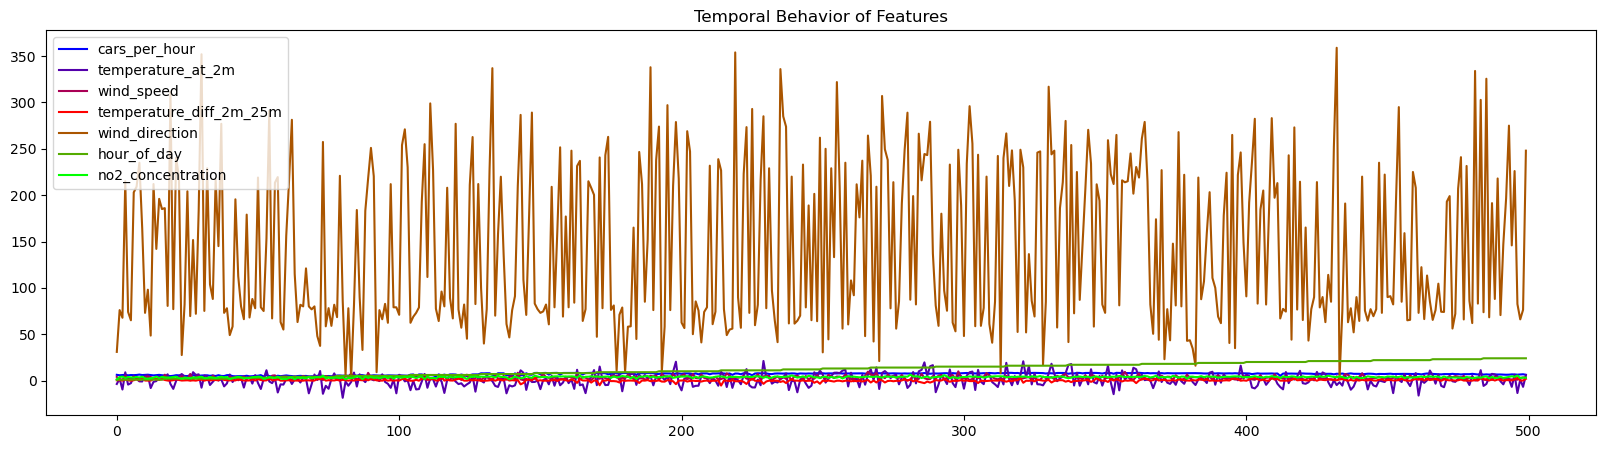

In [11]:
df.plot(use_index=False,figsize=(20,5),cmap=cm.get_cmap('brg'))
plt.title('Temporal Behavior of Features')
plt.show()

In [12]:
df = pd.concat([X, y], axis=1)

#### Task 3
From the plot above it can be seen that `the wind_direction` column is on a completely different scale as compared to others. So, `drop` the `wind_direction` and plot the line plot again.


Ps: It would be a nice practice if you could perform the above task in a single line of code

/var/folders/bs/qy9ssxdj1zg35_516gt13v7m0000gn/T/ipykernel_60695/1220582536.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  df.plot(use_index=False,figsize=(20,5),cmap=cm.get_cmap('brg'))


<Axes: >

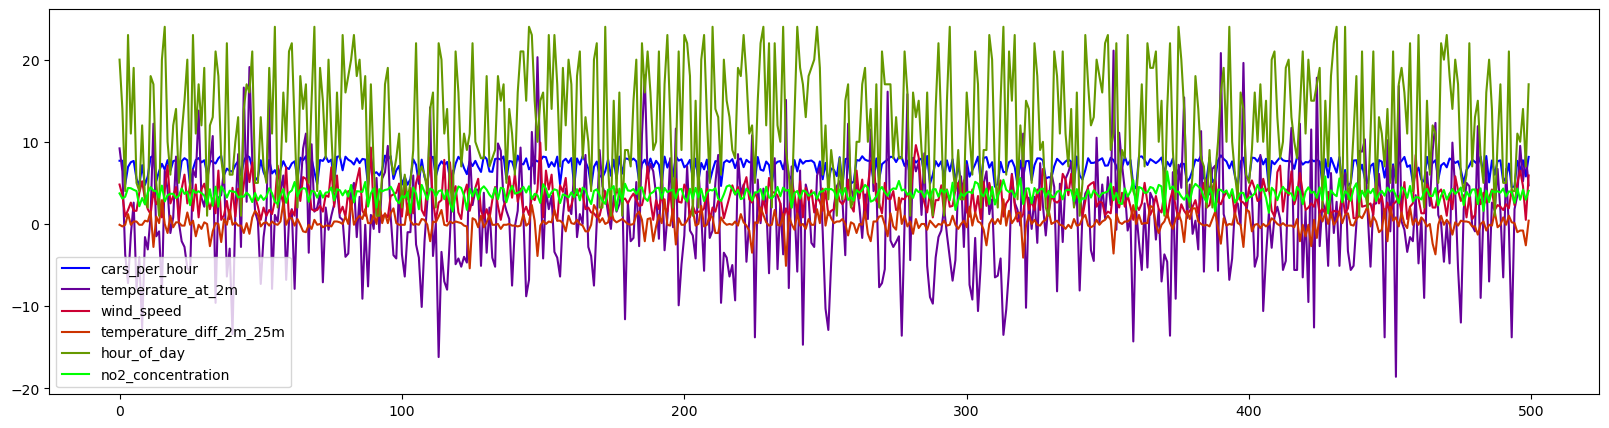

In [13]:
##Solution: Write your code here 
df.drop('wind_direction', axis=1, inplace=True)
df.plot(use_index=False,figsize=(20,5),cmap=cm.get_cmap('brg'))

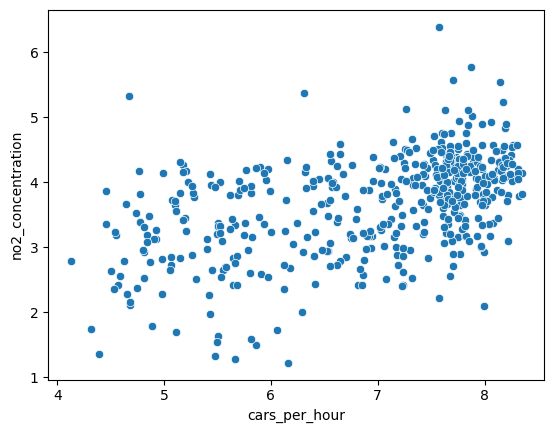

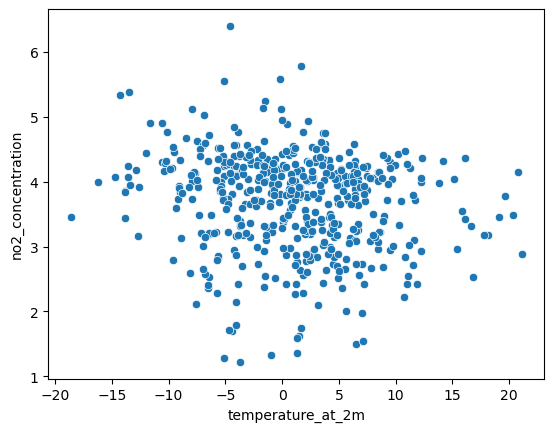

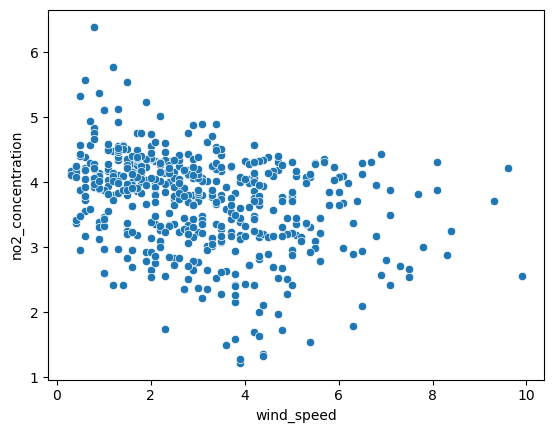

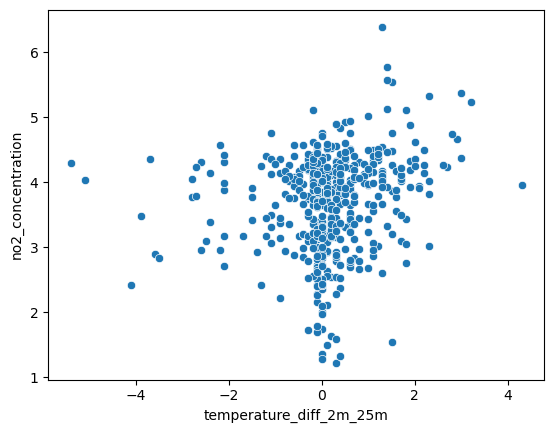

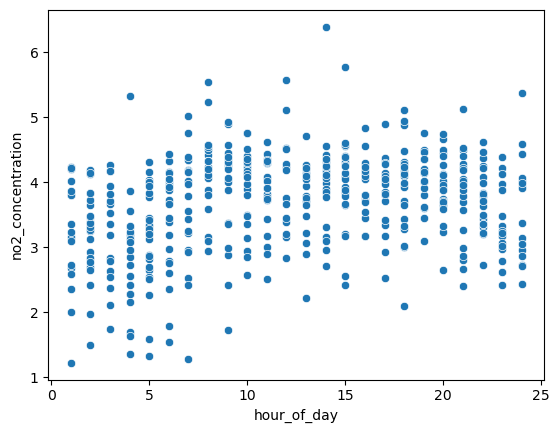

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

features =['cars_per_hour','temperature_at_2m', 'wind_speed','temperature_diff_2m_25m','hour_of_day']

for i in features:
    sns.scatterplot(x=i , y='no2_concentration', data=df)
    plt.show()

In [12]:
corr = df.corr()
corr

,cars_per_hour,temperature_at_2m,wind_speed,temperature_diff_2m_25m,hour_of_day,no2_concentration
cars_per_hour,1.000000,0.201832,0.097531,-0.248154,0.576857,0.512050
temperature_at_2m,0.201832,1.000000,0.165991,-0.392810,0.079485,-0.168159
wind_speed,0.097531,0.165991,1.000000,-0.241520,-0.002790,-0.328835
temperature_diff_2m_25m,-0.248154,-0.392810,-0.241520,1.000000,0.039647,0.174181
hour_of_day,0.576857,0.079485,-0.002790,0.039647,1.000000,0.246201
no2_concentration,0.512050,-0.168159,-0.328835,0.174181,0.246201,1.000000


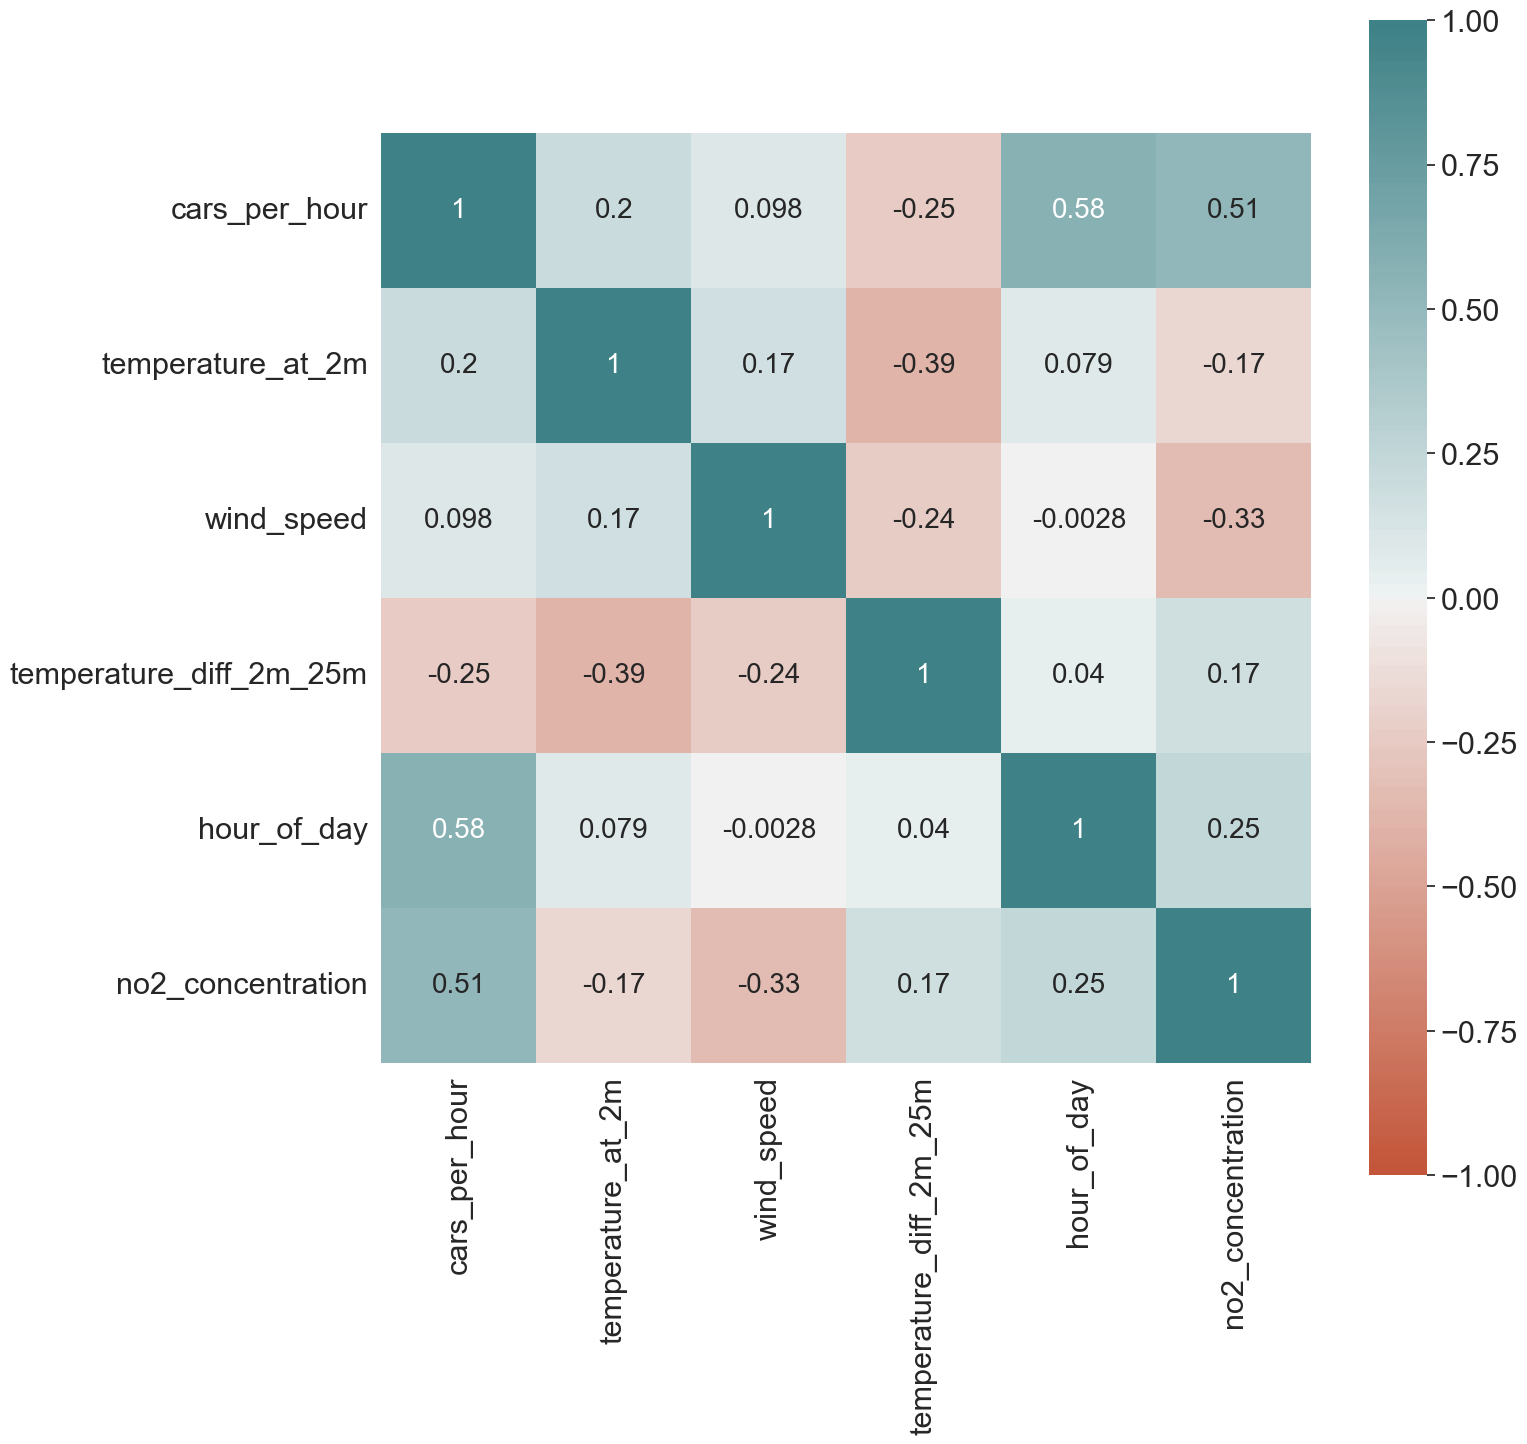

In [13]:
plt.figure(figsize = (15,15))

sns.set(font_scale=2.0)
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 200, n=200),
    square=True,annot=True, annot_kws={'size': 20})


#### Write your analysis
Based on the above plot write a brief analysis of the temporal relationships. Do you observe any correlation between some of the features with the `no2_concentration` target variable? If you see high correlation between some the features and the target variable then try to justify the plausible causes for such observed correlations.

#### Solution


In the scatterplot, correlation table, and heatmap analysis, it is evident that 'cars_per_hour' exhibits the highest correlation coefficient of 0.51 with the target variable 'no2_concentration' among all the features. This correlation implies that as the number of cars on the street increases, there is a rise in NO2 concentration levels. This suggests that vehicle emissions could be a key contributor to the observed high levels of NO2.

## Model Benchmarking
#### Task 4
Per your company's request, you must fit two regression models viz. `LinearRegression` and `KNeighborsRegressor` (default hyperparameters). It is required that you fit the models using 3-fold cross-validation and return the mean train and validation scores for each `estimator`. We will use sklearn to perform Linear and KNN Regression. Furthermore, for cross-validation, you are required to make use of the class `cross_validate` from the [https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html] from the `model_selection` library provided by sklearn. Create a list of models which consists of the respective models. Use `cross_validate` for each model in the list and finally return two lists/arrays `train_scores` and `test_scores` comprising a list of 3 elements for each cross-validation on each of the m models. Store the mean test and train scores for linear regression and KNN in variables `linear_mean_train_scores`, `linear_mean_test_scores`, `knn_mean_train_scores`, `knn_mean_test_scores`.

#### Handling Data Leak
Data leaks happen when the model sees test data during its training regime. This is not optimal as the model may perform well on the test data, as it might have already seen some instances due to an unintended leak. This may have drastic implications when evaluated in real-world settings due to a faulty evaluation of an underfitted model. Thus, to avoid data leaks it is always a best practice to create a separate test dataset and use it only for the final evaluation. To validate during the training regime, a validation set may be used (in the context of this task, `cross_validate` should itself create a validation set when provided a full training dataset `X`.

Thus, Before you implement `cross_validate`, use `train_test_split` to reserve 20% of `X` as a test dataset named `X_test` and use `X_train` and `y_train for `cross_validate`.

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size = 0.2, random_state=0)



In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate
##Solution write your code here 

lr = LinearRegression()
lr_train_scores = cross_validate(lr, X_train, y_train, cv=3)
lr_mean_train_scores = np.mean(lr_train_scores)
lr_test_scores = cross_validate(lr, X_test, y_test, cv=3)['test_score']
lr_mean_test_scores = np.mean(lr_test_scores)

knn = KNeighborsRegressor()
knn_train_scores = cross_validate(knn, X_train, y_train, cv=3)['test_score']
knn_mean_train_scores = np.mean(knn_train_scores)
knn_test_scores = cross_validate(knn, X_test, y_test, cv=3)['test_score']
knn_mean_test_scores = np.mean(knn_test_scores)

print(f'Linear Regression train scores : {lr_train_scores}, mean : {round(lr_mean_train_scores,2)}')
print(f'Linear Regression test scores : {lr_test_scores}, mean: {round(lr_mean_test_scores,2)}')
print(f'NeighborsRegressor train scores : {knn_train_scores}, mean : {round(knn_mean_train_scores,2)}')
print(f'NeighborsRegressor test scores : {knn_test_scores}, mean : {round(knn_mean_test_scores,2)}')

{'fit_time': array([0.00367618, 0.00277877, 0.00246   ]), 'score_time': array([0.00213099, 0.00194407, 0.00181603]), 'test_score': array([0.52397357, 0.50382734, 0.43870595])}


TypeError: unsupported operand type(s) for /: 'dict' and 'int'

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate
##Solution write your code here 

lr = LinearRegression()
knn = KNeighborsRegressor()

models = [lr,knn]

xvals = [cross_validate(model, X_train, y_train,return_train_score=True, cv=3) for model in models]

test_scores = [x['test_score'] for x in xvals]
train_scores = [x['train_score'] for x in xvals]

linear_mean_test_scores = np.mean(test_scores[0])
linear_mean_train_scores = np.mean(train_scores[0])
knn_mean_test_scores = np.mean(test_scores[1])
knn_mean_train_scores = np.mean(train_scores[1])


print(f'Linear Regression train scores : {train_scores[0]}, mean : {round(linear_mean_train_scores,2)}')
print(f'Linear Regression test scores : {test_scores[0]}, mean: {round(linear_mean_test_scores,2)}')
print(f'NeighborsRegressor train scores : {train_scores[1]}, mean : {round(knn_mean_train_scores,2)}')
print(f'NeighborsRegressor test scores : {test_scores[1]}, mean : {round(knn_mean_test_scores,2)}')

Linear Regression train scores : [0.50336515 0.51137064 0.53571534], mean : 0.52
Linear Regression test scores : [0.52397357 0.50382734 0.43870595], mean: 0.49
NeighborsRegressor train scores : [0.44111727 0.43955952 0.34364112], mean : 0.41
NeighborsRegressor test scores : [ 0.1300522  -0.00333816  0.09087774], mean : 0.07


#### Visualising the performance

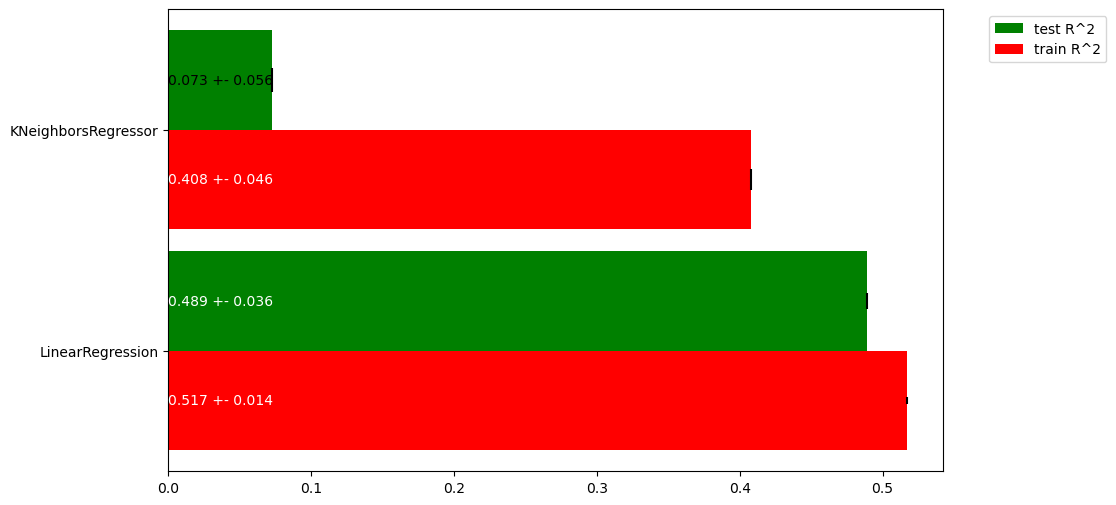

In [45]:
fig, ax = plt.subplots(figsize=(10,6))
width=0.45

ax.barh(np.arange(len(train_scores)), np.mean(test_scores, axis=1), width,
        yerr= np.std(test_scores, axis=1), color='green', label='test R^2')
ax.barh(np.arange(len(train_scores))-width, np.mean(train_scores, axis=1), width,
        yerr= np.std(train_scores, axis=1), color='red', label='train R^2')
for i, te, tr in zip(np.arange(len(train_scores)),test_scores,train_scores):
    ax.text(0, i, "{:.3f} +- {:.3f}".format(np.mean(te),np.std(te)), color=('white' if np.mean(te)>0.1 else 'black'), va='center')
    ax.text(0, i-width, "{:.3f} +- {:.3f}".format(np.mean(tr),np.std(tr)), color=('white' if np.mean(tr)>0.1 else 'black'), va='center')
labels = [c.__class__.__name__ if not hasattr(c, 'steps') else c.steps[0][0] + "_" + c.steps[1][0] for c in models]
ax.set(yticks=np.arange(len(train_scores))-width/2, yticklabels=labels)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

### Model Evaluation

#### Task 5

Now, train the best performing model on `X_train`, `y_test` and see how the model performs on the test data `X_test` and `y_test`. Evaluate the performance of your model on test data concerning 3 metrics, mean absolute error, mean squared error and r2. Use the `sklearn.metrics` library for the evaluation. Report your analysis.

In [17]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)

print('MAE : {0:.3f} , MSE : {1:.3F}'.format(mae , mse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, pred)))


MAE : 0.395 , MSE : 0.265
Variance score : 0.468


## Conclusion

1) Summarize the findings and provide insights based on the analysis.<br/>
2) Discuss the potential applications of the final selection model in real-world scenarios

<b>Present here your analysis</b>

After comparing the train/test scores of both models, I chose Linear Regression model due to the negative cross-validation scores observed with the KNeighbors Regressor, indicating its poor performance. In addition, huge difference between the train and test scores in Kneighbors regressors further confirmed overfitting. it performed quite well in the training set but poor performance in test data. By using Linear Regression, I achieved a mean absolute error of 0.395, a mean squared error of 0.265, and an R-squared value of 0.468.

In real world, we can predict no2 concentration by using this model. It can help to reduce excessive no2 concentration and regulate cars in the road (e.g. The alternative-day-no-driving system 

In [47]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.neighbors import KNeighborsRegressor

param_a = {'alpha' : np.logspace(-12,12, num=22)}
param_n = {'kneighborsregressor__n_neighbors' : np.geomspace(1,60, num=12, dtype=int)}


In [48]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

models = [Ridge(), Lasso(), make_pipeline(StandardScaler(), KNeighborsRegressor())]
grids = [param_a, param_a, param_n]

In [49]:
from sklearn.model_selection import GridSearchCV

grid_searches = [GridSearchCV(m, grid, n_jobs=-1, cv=3, return_train_score = True).fit(X, y) for m, grid in zip(models, grids)]

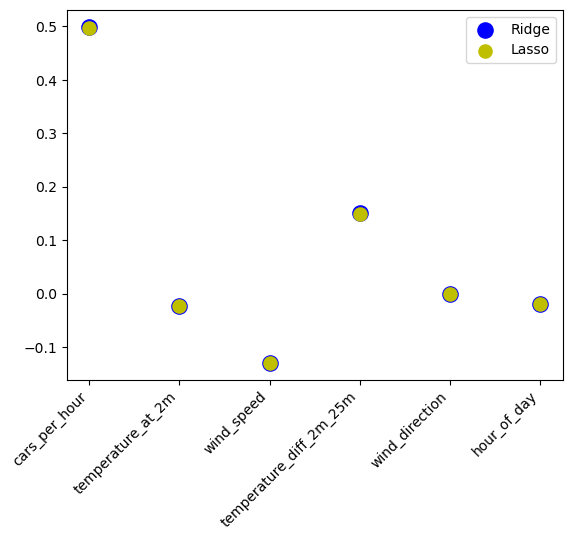

In [60]:
def scatter_coefficients(alpha=0.001):
    models = [Ridge(alpha=alpha), Lasso(alpha=alpha)]
    coeff = [m.fit(X,y).coef_ for m in models]
    attribute_names = list(X)

    col = ['b','y']
    plt.figure()
    plt.xticks(rotation=45,ha="right")
    for i in range(0,2):
        plt.scatter(attribute_names, coeff[i], s=(4-i)*30, c=col[i], label=models[i].__class__.__name__)
    plt.legend();
scatter_coefficients(alpha=0.001)